In [347]:
import os

ross_data_path = "/home/lenovo/Downloads/ross-results.csv"

path_100us = "/home/lenovo/Downloads/results-exp1-inet-slim/100us-interval"
path_500us = "/home/lenovo/Downloads/results-exp1-inet-slim/500us-interval"
path_1000us = "/home/lenovo/Downloads/results-exp1-inet-slim/1000us-interval"

jsons_100us = os.listdir(path_100us)
jsons_500us = os.listdir(path_500us)
jsons_1000us = os.listdir(path_1000us)

In [348]:
with open(ross_data_path, "r") as f:
    ross_data = [x.strip().split(',') for x in f]
    #ross_data = {ross_data[0][i]:[x[i] for x in ross_data[1:]] for i in range(len(ross_data[0]))}

i = 0
for lab, data in zip(ross_data[0], ross_data[1]):
    print(i, lab,":",data)
    i+=1

0 run_id : 0
1 generation_interval_us : 100
2 execution_time_s : 6.2798
3 simulator : ROSS
4 average_delay_ns : 152612388.2
5 jitter : 131453923.7
6 drop_rate : 0.219457257
7 total_events : 4165846


In [349]:
ross_plot_data_100 = {
    "execution_time": [float(x[2]) for x in ross_data if x[1] == '100'],
    "delay": [float(x[4]) for x in ross_data if x[1] == '100'],
    "jitter": [float(x[5]) for x in ross_data if x[1] == '100'],
    "drop_rate": [float(x[6]) for x in ross_data if x[1] == '100'],
}   

ross_plot_data_500 = {
    "execution_time": [float(x[2]) for x in ross_data if x[1] == '500'],
    "delay": [float(x[4]) for x in ross_data if x[1] == '500'],
    "jitter": [float(x[5]) for x in ross_data if x[1] == '500'],
    "drop_rate": [float(x[6]) for x in ross_data if x[1] == '500'],
}  

ross_plot_data_1000 = {
    "execution_time": [float(x[2]) for x in ross_data if x[1] == '1000'],
    "delay": [float(x[4]) for x in ross_data if x[1] == '1000'],
    "jitter": [float(x[5]) for x in ross_data if x[1] == '1000'],
    "drop_rate": [float(x[6]) for x in ross_data if x[1] == '1000'],
}  

ross_comb = [ross_plot_data_100, ross_plot_data_500, ross_plot_data_1000]

In [350]:
import json

def parse_repeat_experiments_INET(path, files):
    data = []
    for file in files:
        with open(path+'/'+file, "r") as f:
            data.append(json.load(f))   

    return data      

def create_dict(data):
    inet_data = {x:list() for x in ross_plot_data_100.keys()}

    for d in data:
        inet_data['execution_time'].append(d['elapsed'])
        inet_data['jitter'].append(d['jitter'])
        inet_data['delay'].append(d['delay']['avg'])
        inet_data['drop_rate'].append(d["drop_rate"])
    
    return inet_data

data_100 = parse_repeat_experiments_INET(path_100us, jsons_100us)
inet_plot_data_100 = create_dict(data_100)

data_500 = parse_repeat_experiments_INET(path_500us, jsons_500us)
inet_plot_data_500 = create_dict(data_500)

data_1000 = parse_repeat_experiments_INET(path_1000us, jsons_1000us)
inet_plot_data_1000 = create_dict(data_1000)

inet_comb = [inet_plot_data_100, inet_plot_data_500, inet_plot_data_1000]

In [351]:
def plot_double_bar(ax, position, a, b, fontsize=8, **kwargs):
    """
    Plot two bars next to each other on the given axes object.

    Parameters:
        ax (matplotlib.axes.Axes): The axes object to plot on.
        position (float): The position for the bars.
        a (float): Value for the first bar.
        b (float): Value for the second bar.
    """
    # Define the width of each bar
    bar_width = 0.35

    # Calculate the positions for the bars
    bar1_pos = position - bar_width / 2
    bar2_pos = position + bar_width / 2

    # Plot the bars
    ax.bar(bar1_pos, a, bar_width, label='A', color='blue', zorder=2)
    ax.bar(bar2_pos, b, bar_width, label='B', color='green', zorder=2)

    
    offsets = (0, 0) if "offsets" not in kwargs else kwargs["offsets"]

    ax.text(bar1_pos + bar_width / 2 - offsets[0], a, str(round(a,3)), ha='right', va='bottom', fontsize=fontsize)
    ax.text(bar2_pos + bar_width / 2 + offsets[1], b, str(round(b,3)), ha='right', va='bottom', fontsize=fontsize)

    #ax.legend()

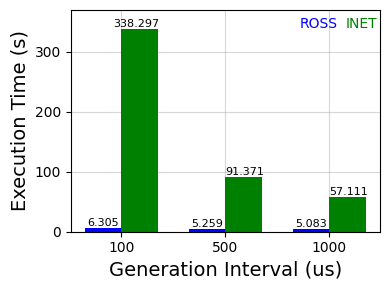

In [352]:
import matplotlib.pyplot as plt
import statistics as st

x_title = "Generation Interval (us)"
y_title = "Execution Time (s)"
plotting_variable = "execution_time"

# Example usage:
# Create a figure and axes object
fig, ax = plt.subplots()
fig.set_figwidth(4)
fig.set_figheight(3)

pos = 0
for ross, inet in zip(ross_comb, inet_comb):
    # Call the function to plot the double bar
    plot_double_bar(ax, pos, st.mean(ross[plotting_variable]), st.mean(inet[plotting_variable]), offsets=(0.02,0.02))
    pos += 1

ax.set_xticks([0,1,2], labels=[100, 500, 1000])
ax.set_ylim(0,370)

# Set labels and legend
ax.set_ylabel(y_title, fontsize=14)
ax.set_xlabel(x_title, fontsize=14)

ax.text(0.74, 0.92, f'ROSS', color='blue', transform=ax.transAxes, fontsize=10)
ax.text(0.89, 0.92, f'INET', color='green', transform=ax.transAxes, fontsize=10)

ax.set_xticks([0,1,2], labels=[100, 500, 1000])

ax.grid(alpha=.5)

plt.tight_layout()
plt.savefig("figures/execution.pdf", format='pdf')
plt.show()

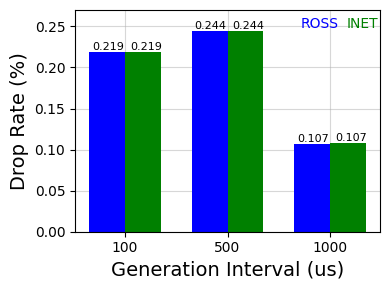

In [353]:
import matplotlib.pyplot as plt
import statistics as st

x_title = "Generation Interval (us)"
y_title = "Drop Rate (%)"
plotting_variable = "drop_rate"


# Example usage:
# Create a figure and axes object
fig, ax = plt.subplots()

fig.set_figwidth(4)
fig.set_figheight(3)

pos = 0
for ross, inet in zip(ross_comb, inet_comb):
    # Call the function to plot the double bar
    plot_double_bar(ax, pos, st.mean(ross[plotting_variable]), st.mean(inet[plotting_variable]), offsets=(.01,0.01))
    pos += 1

ax.set_xticks([0,1,2], labels=[100, 500, 1000])
ax.set_ylim(0,.27)

# Set labels and legend
ax.set_ylabel(y_title, fontsize=14)
ax.set_xlabel(x_title, fontsize=14)

ax.text(0.74, 0.92, f'ROSS', color='blue', transform=ax.transAxes, fontsize=10)
ax.text(0.89, 0.92, f'INET', color='green', transform=ax.transAxes, fontsize=10)

ax.set_xticks([0,1,2], labels=[100, 500, 1000])

ax.grid(alpha=.5)

plt.tight_layout()
plt.savefig("figures/drop_rate.pdf", format='pdf')
# Show the plot
plt.show()

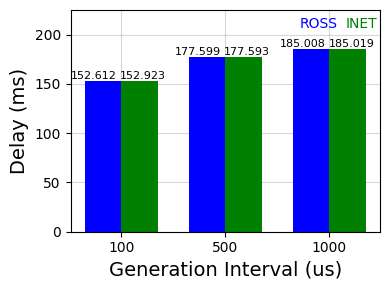

In [354]:
import matplotlib.pyplot as plt
import statistics as st

x_title = "Generation Interval (us)"
y_title = "Delay (ms)"
plotting_variable = "delay"


# Example usage:
# Create a figure and axes object
fig, ax = plt.subplots()

fig.set_figwidth(4)
fig.set_figheight(3)

pos = 0
for ross, inet in zip(ross_comb, inet_comb):
    # Call the function to plot the double bar
    plot_double_bar(ax, pos, st.mean(ross[plotting_variable])/1_000_000, st.mean(inet[plotting_variable])/1_000_000, offsets=(0.04,0.08))
    pos += 1

ax.set_ylim(0,225)


# Set labels and legend
ax.set_ylabel(y_title, fontsize=14)
ax.set_xlabel(x_title, fontsize=14)

ax.text(0.74, 0.92, f'ROSS', color='blue', transform=ax.transAxes, fontsize=10)
ax.text(0.89, 0.92, f'INET', color='green', transform=ax.transAxes, fontsize=10)

ax.set_xticks([0,1,2], labels=[100, 500, 1000])

ax.grid(alpha=.5)

plt.tight_layout()

plt.savefig("figures/delay.pdf", format='pdf')
plt.show()

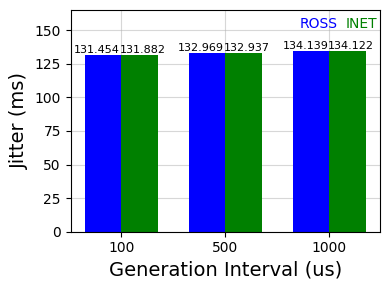

In [355]:
import matplotlib.pyplot as plt
import statistics as st

x_title = "Generation Interval (us)"
y_title = "Jitter (ms)"
plotting_variable = "jitter"


# Example usage:
# Create a figure and axes object
fig, ax = plt.subplots()

fig.set_figwidth(4)
fig.set_figheight(3)

pos = 0
for ross, inet in zip(ross_comb, inet_comb):
    # Call the function to plot the double bar
    plot_double_bar(ax, pos, st.mean(ross[plotting_variable])/1_000_000, st.mean(inet[plotting_variable])/1_000_000, offsets=(0.01,0.08))
    pos += 1

ax.set_ylim(0,165)

# Set labels and legend
ax.set_ylabel(y_title, fontsize=14)
ax.set_xlabel(x_title, fontsize=14)

ax.text(0.74, 0.92, f'ROSS', color='blue', transform=ax.transAxes, fontsize=10)
ax.text(0.89, 0.92, f'INET', color='green', transform=ax.transAxes, fontsize=10)

ax.set_xticks([0,1,2], labels=[100, 500, 1000])

ax.grid(alpha=.5)

plt.tight_layout()
plt.savefig("figures/jitter.pdf", format='pdf')
# Show the plot
plt.show()


In [443]:
path_to_data = "/home/lenovo/Downloads/results-scalability"

def extract_runtime(data):
    data = ' '.join(data)
    seconds = data.split("Running Time = ")[1].split("seconds")[0]
    seconds = float(seconds.replace(' ',''))
    
    return seconds

def extract_efficiancy(data):
    data = ' '.join(data)
    eff = data.split("Efficiency")[1].split("%")[0]
    eff = float(eff.replace(' ',''))
    
    return eff

pe_dirs = os.listdir(path_to_data)

results = {}
for num_pe, dir in zip([2,4,8,16,20,32,64], pe_dirs):
    path = path_to_data+'/'+dir
    txts = os.listdir(path)

    runtime, efficiancy = [], []

    for txt in txts:
        with open(path+'/'+txt, 'r') as f:
            data = f.readlines()

        runtime.append(extract_runtime(data))
        efficiancy.append(extract_efficiancy(data))

    pe = int(path.split('/')[-1].replace('pe',''))
    results[pe] = {"rt": st.mean(runtime), "eff":st.mean(efficiancy)}

results[1] = {'rt': 72.7353, 'eff': 100.00}

results = [(key, value) for key, value in results.items()]
results = sorted(results, key=lambda x:x[0])

results

[(1, {'rt': 72.7353, 'eff': 100.0}),
 (2, {'rt': 109.70684, 'eff': 79.24}),
 (4, {'rt': 91.47116, 'eff': 77.35}),
 (8, {'rt': 110.3853, 'eff': 26.75}),
 (16, {'rt': 73.93115999999999, 'eff': 5.21}),
 (20, {'rt': 110.93944, 'eff': -61.382000000000005}),
 (32, {'rt': 127.32634, 'eff': -121.892}),
 (64, {'rt': 142.03521999999998, 'eff': -312.738})]

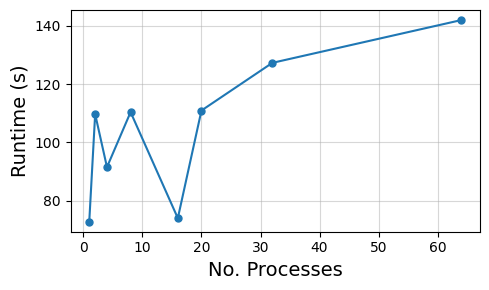

In [490]:
# Sample data
x = [x[0] for x in results]
y = [x[1]['rt'] for x in results]

# Create figure and axes objects
fig, ax = plt.subplots()
fig.set_figwidth(5)
fig.set_figheight(3)

# Plot the line chart with dot markers
ax.plot(x, y, marker='o', linestyle='-', markersize=5)

ax.set_ylabel('Runtime (s)', fontsize=14)
ax.set_xlabel('No. Processes', fontsize=14)

# Show grid
ax.grid(alpha=.5)

#ax.set_xticks(ticks=[1,2,4,8,16,20,32,64], labels=[1,2,4,8,16,20,32,64])

#ax.set_xscale('log')
# Show the plot
plt.tight_layout()
plt.savefig("figures/RT.pdf", format='pdf')
plt.show()

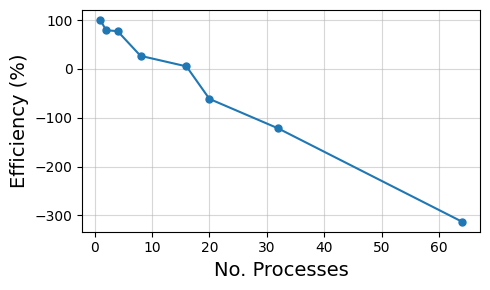

In [488]:
# Sample data
x = [x[0] for x in results]
y = [x[1]['eff'] for x in results]

# Create figure and axes objects
fig, ax = plt.subplots()
fig.set_figwidth(5)
fig.set_figheight(3)

# Plot the line chart with dot markers
ax.plot(x, y, marker='o', linestyle='-', markersize=5)

ax.set_ylabel('Efficiency (%)', fontsize=14)
ax.set_xlabel('No. Processes',fontsize=14)

# Show grid
ax.grid(alpha=.5)

#ax.set_xticks(ticks=[2,4,8,16,20,32,64])

#ax.set_xscale('log')
# Show the plot
plt.tight_layout()
plt.savefig("figures/eff.pdf", format='pdf')
plt.show()

In [48]:
# path: the path to the result file
# col: which column you want to plot (average of all repeats per number of pes)
# lable: the label for the line
plot_data = [
    {
        "path": "/home/lenovo/Downloads/ZTE/ross-results-csv-cleaned/ross-v-e-weights-pkt.csv",
        "col": "runtime",
        "label": "vertex + edge"
    },
    {
        "path": "/home/lenovo/Downloads/ZTE/ross-results-csv-cleaned/ross-vertex-weights-event.csv",
        "col": "runtime",
        "label": "vertex"
    }
]

x_title = "No. processes"
y_title = "Runtime (s)"

save_name = "fig1.pdf"

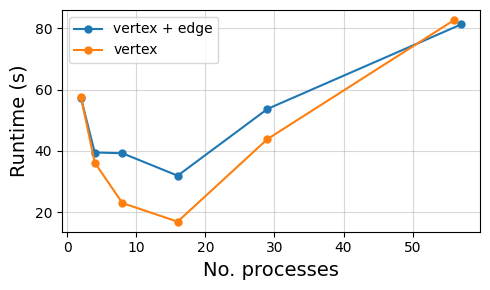

In [50]:
import pandas
import statistics as st
import matplotlib.pyplot as plt

def parse_file(path, label='runtime'):
    results = pandas.read_csv(path)

    no_pe = results['total_pe'].to_list()
    rt = results[label].to_list()

    results = {key: list() for key in sorted(no_pe)}

    for pe, rt in zip(no_pe, rt):
        results[pe].append(rt)

    results = {key: st.mean(value) for key, value in results.items()}

    return results

def add_line(results, ax, label):    
    x = [x for x in results.keys()]
    y = [x for x in results.values()]

    # Plot the line chart with dot markers
    ax.plot(x, y, marker='o', linestyle='-', markersize=5, label=label)

    if label != "":
        ax.legend()
    

# Create figure and axes objects
fig, ax = plt.subplots()
fig.set_figwidth(5)
fig.set_figheight(3)

for data in plot_data:
    results = parse_file(data['path'], label=data['col'])
    add_line(results, ax, data['label'])


ax.set_ylabel(y_title, fontsize=14)
ax.set_xlabel(x_title,fontsize=14)


# Show grid
ax.grid(alpha=.5)

#ax.set_xticks(ticks=[2,4,8,16,20,32,64])

#ax.set_xscale('log')
# Show the plot
plt.tight_layout()
plt.savefig(f"{save_name}", format='pdf')
plt.show()